Plant growth: control group and two treatments

    observation  weight group
0             1    4.17  ctrl
1             2    5.58  ctrl
2             3    5.18  ctrl
3             4    6.11  ctrl
4             5    4.50  ctrl
5             6    4.61  ctrl
6             7    5.17  ctrl
7             8    4.53  ctrl
8             9    5.33  ctrl
9            10    5.14  ctrl
10            1    4.81  trt1
11            2    4.17  trt1
12            3    4.41  trt1
13            4    3.59  trt1
14            5    5.87  trt1
15            6    3.83  trt1
16            7    6.03  trt1
17            8    4.89  trt1
18            9    4.32  trt1
19           10    4.69  trt1
20            1    6.31  trt2
21            2    5.12  trt2
22            3    5.54  trt2
23            4    5.50  trt2
24            5    5.37  trt2
25            6    5.29  trt2
26            7    4.92  trt2
27            8    6.15  trt2
28            9    5.80  trt2
29           10    5.26  trt2


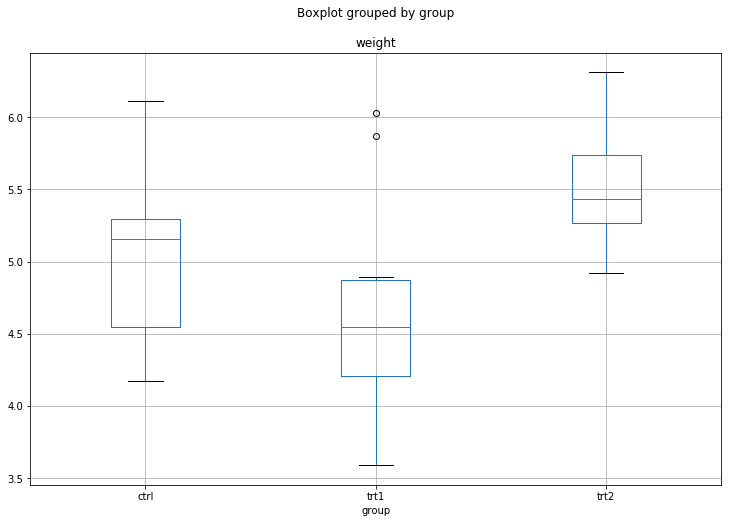

In [0]:
import pandas as pd


datafile = 'https://resources.oreilly.com/examples/9781783981960/raw/500923e04f07659d1fc54a15819f95c1be0c6771/Mastering%20Pandas_CodeFiles/Chapter%205/PlantGrowth.csv'
df = pd.read_csv(datafile)

print(df)

#Create a boxplot
df.boxplot('weight', by='group', figsize=(12, 8))

ctrl = df['weight'][df.group == 'ctrl']

grps = pd.unique(df.group.values)
d_data = {grp:df['weight'][df.group == grp] for grp in grps}

k = len(pd.unique(df.group))  # number of conditions
N = len(df.values)  # conditions times participants
n = df.groupby('group').size()[0] #Participants in each condition

### Anova usig Scipy


In [0]:
from scipy import stats

F, p = stats.f_oneway(d_data['ctrl'], d_data['trt1'], d_data['trt2'])

print("F = ",F, " probability of null hypothesis = ",p)

F =  4.846087862380136  probability of null hypothesis =  0.0159099583256229


### Degrees of Fredoom

In [0]:
### Calculate the degrees of freedom
DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

### Sum of Squares Between, WIthin, and Total

In [0]:
# Between
SSbetween = (sum(df.groupby('group').sum()['weight']**2)/n) \
    - (df['weight'].sum()**2)/N

# Within
sum_y_squared = sum([value**2 for value in df['weight'].values])
SSwithin = sum_y_squared - sum(df.groupby('group').sum()['weight']**2)/n

# Total
SStotal = sum_y_squared - (df['weight'].sum()**2)/N

### Means Square Errors and F-value

In [0]:
MSbetween = SSbetween/DFbetween
MSwithin = SSwithin/DFwithin

F = MSbetween/MSwithin

In [0]:
### Obtaining the p-value

In [0]:
p = stats.f.sf(F, DFbetween, DFwithin)

### Calculate Effect sizes: Eta Squared and Omega Squared:

In [0]:
eta_sqrd = SSbetween/SStotal
om_sqrd = (SSbetween - (DFbetween * MSwithin))/(SStotal + MSwithin)

results = {'sum_sq':[SSbetween, SSwithin],
           'df':[DFbetween, DFwithin],
           'F':[F, ''],
            'PR(>F)':[p, ''],
          'EtaSq':[eta_sqrd, ''],
          'OmegaSq':[om_sqrd, '']}

aov_table1 = pd.DataFrame(results, 
                          index=['Group', 'Residual'])
    
aov_table1

,sum_sq,df,F,PR(>F),EtaSq,OmegaSq
Group,3.76634,2,4.84609,0.01591,0.264148,0.204079
Residual,10.49209,27,,,,


In [0]:
# Put into dataframe

df = pd.DataFrame(df)


#print (d_data)
#print("==========================================================")
#print(df)
#print("==========================================================")
# Stack the data (and rename columns):


# Stack the data (and rename columns):

###stacked_data = df.stack().reset_index()
stacked_data = df.reset_index()
stacked_data = stacked_data.rename(columns={'id': 'id',
                                            'group': 'treatment',
                                            'weight':'result'})
# Show the first 30 rows:

#print (stacked_data.head(30))

In [0]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

# Set up the data for comparison (creates a specialised object)
MultiComp = MultiComparison(stacked_data['result'],
                            stacked_data['treatment'])

# Show all pair-wise comparisons:

# Print the comparisons

print(MultiComp.tukeyhsd(0.20).summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.20
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
  ctrl   trt1   -0.371 0.3921 -0.8634 0.1214  False
  ctrl   trt2    0.494  0.198  0.0016 0.9864   True
  trt1   trt2    0.865  0.012  0.3726 1.3574   True
---------------------------------------------------
